Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Loading Data

In [2]:
df = pd.read_csv('C:\\Users\\Aditya Kadam\\Downloads\\archive\\AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


Check for missing values

In [3]:
df.isna().mean()

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

Here we will do feature engineering...by adding new features based on the date column

In [4]:
def datetime(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['day_of_week'] = df['Date'].dt.dayofweek
    df['day_name'] = df['Date'].dt.day_name()
    df['quarter'] = df['Date'].dt.quarter

    return df

In [5]:
df = datetime(df)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,day_of_week,day_name,quarter
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,1980,12,12,4,Friday,4
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,1980,12,15,0,Monday,4
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,1980,12,16,1,Tuesday,4
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,1980,12,17,2,Wednesday,4
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,1980,12,18,3,Thursday,4


Here we will add additional features...lagged features based on feature "Close"

In [6]:
def add_feature(df):
    df['lag_1'] = df['Close'].shift(1)
    df['lag_2'] = df['Close'].shift(2)
    df['lag_3'] = df['Close'].shift(3)
    df['lag_4'] = df['Close'].shift(4)
    df['lag_5'] = df['Close'].shift(5)
    return df

In [7]:
df = add_feature(df)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,day_of_week,day_name,quarter,lag_1,lag_2,lag_3,lag_4,lag_5
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,1980,12,12,4,Friday,4,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,1980,12,15,0,Monday,4,0.128348,NaN,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,1980,12,16,1,Tuesday,4,0.121652,0.128348,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,1980,12,17,2,Wednesday,4,0.112723,0.121652,0.128348,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,1980,12,18,3,Thursday,4,0.115513,0.112723,0.121652,0.128348,NaN


In [8]:
df.isna().mean()

Date           0.000000
Open           0.000000
High           0.000000
Low            0.000000
Close          0.000000
Adj Close      0.000000
Volume         0.000000
year           0.000000
month          0.000000
day            0.000000
day_of_week    0.000000
day_name       0.000000
quarter        0.000000
lag_1          0.000096
lag_2          0.000191
lag_3          0.000287
lag_4          0.000382
lag_5          0.000478
dtype: float64

Dropping rows with missing values

In [9]:
df.dropna(inplace = True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,day_of_week,day_name,quarter,lag_1,lag_2,lag_3,lag_4,lag_5
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400,1980,12,19,4,Friday,4,0.118862,0.115513,0.112723,0.121652,0.128348
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200,1980,12,22,0,Monday,4,0.126116,0.118862,0.115513,0.112723,0.121652
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400,1980,12,23,1,Tuesday,4,0.132254,0.126116,0.118862,0.115513,0.112723
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200,1980,12,24,2,Wednesday,4,0.137835,0.132254,0.126116,0.118862,0.115513
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400,1980,12,26,4,Friday,4,0.145089,0.137835,0.132254,0.126116,0.118862


We will do the data Visualisation to get a better understanding of the data 

C:\Users\Aditya Kadam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Aditya Kadam\AppData\Local\Temp\ipykernel_14552\128328605.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


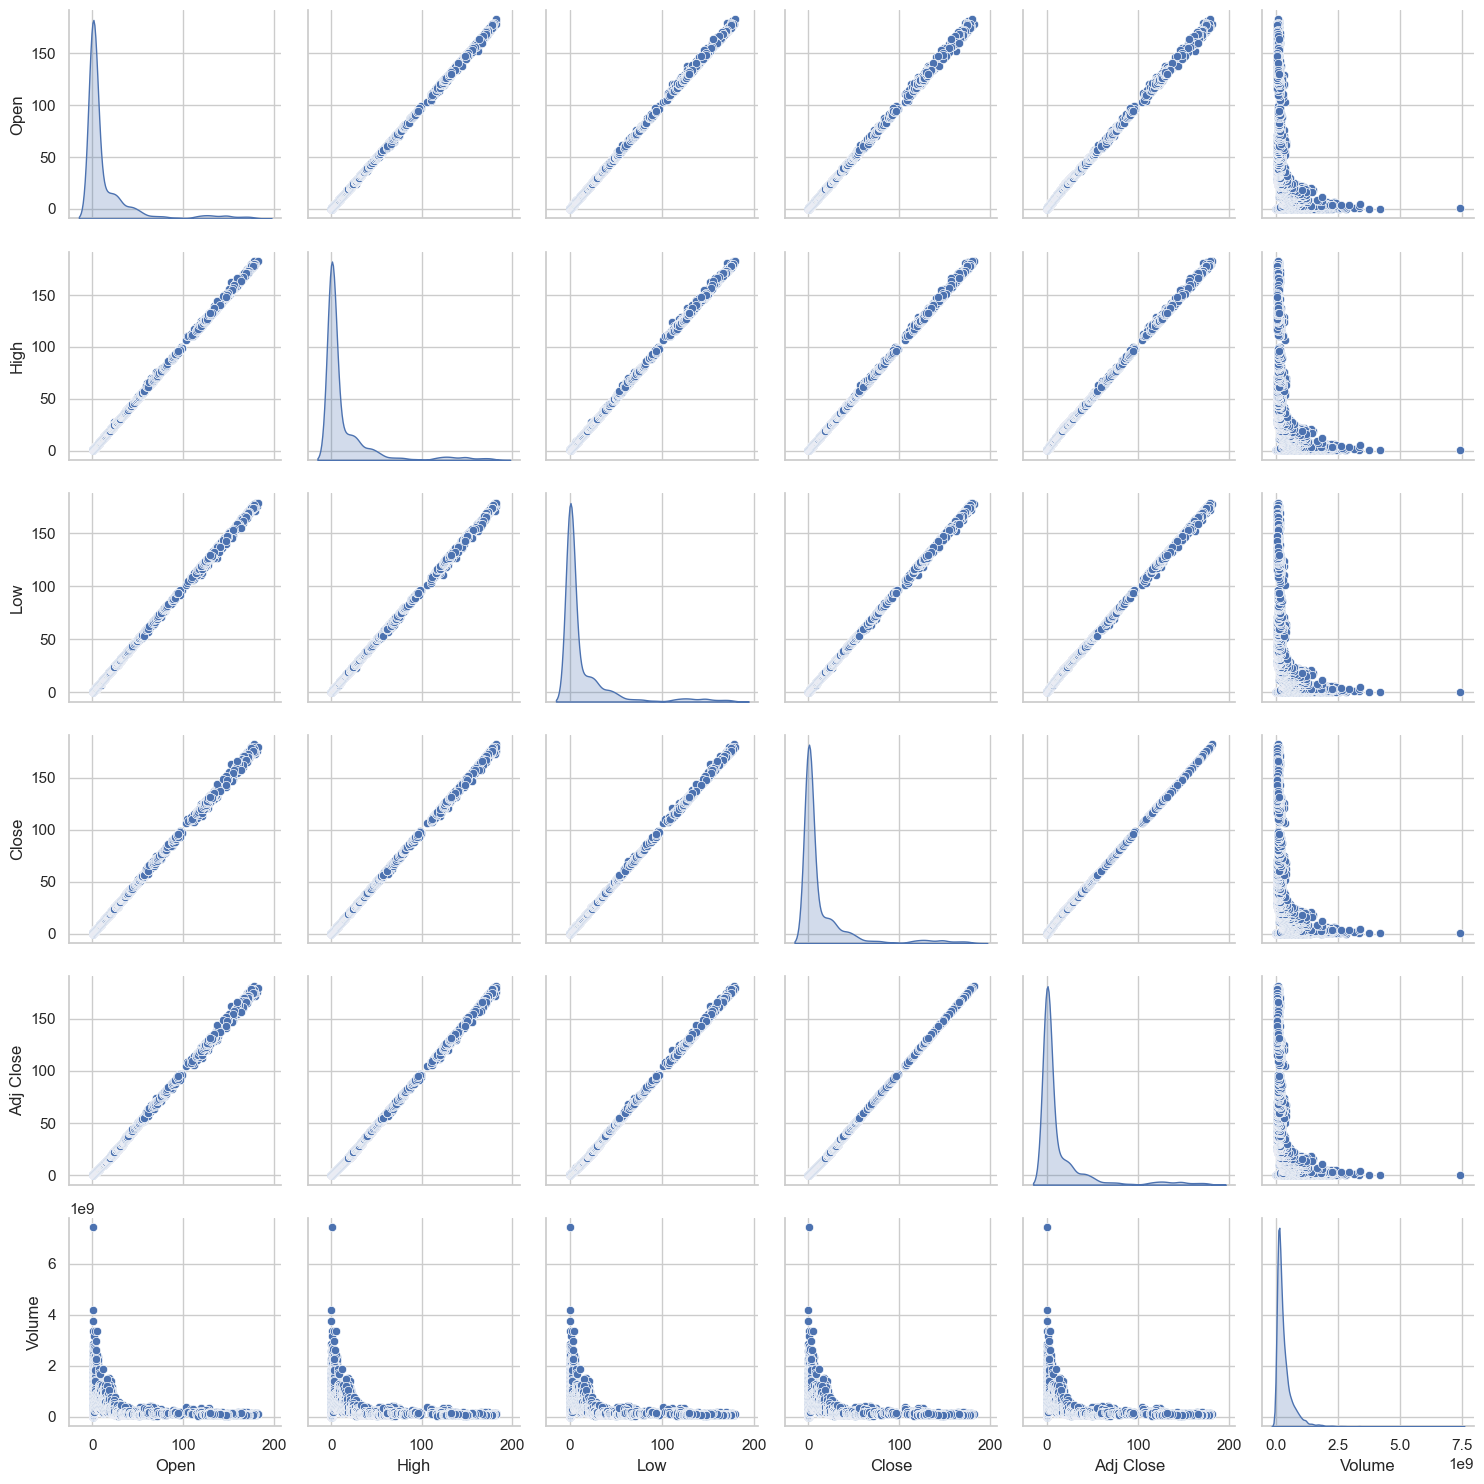

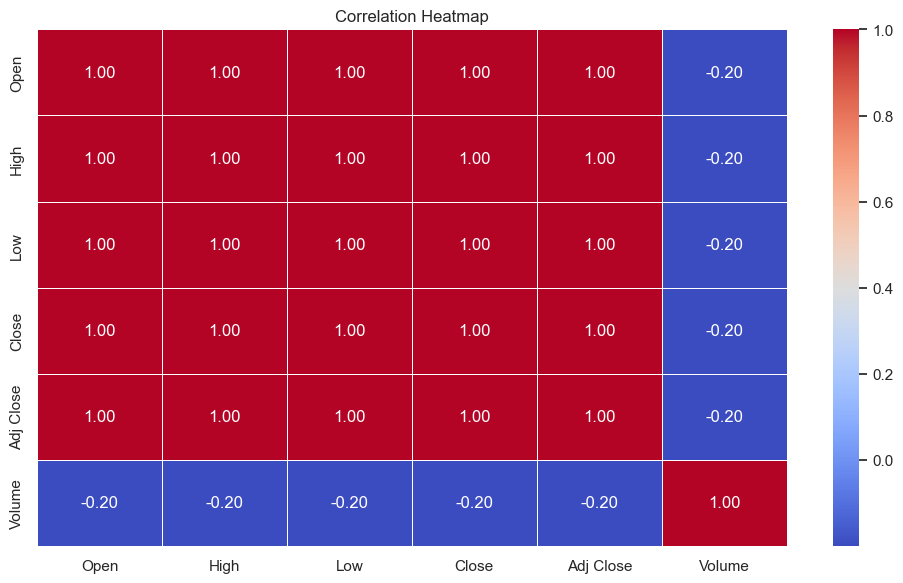

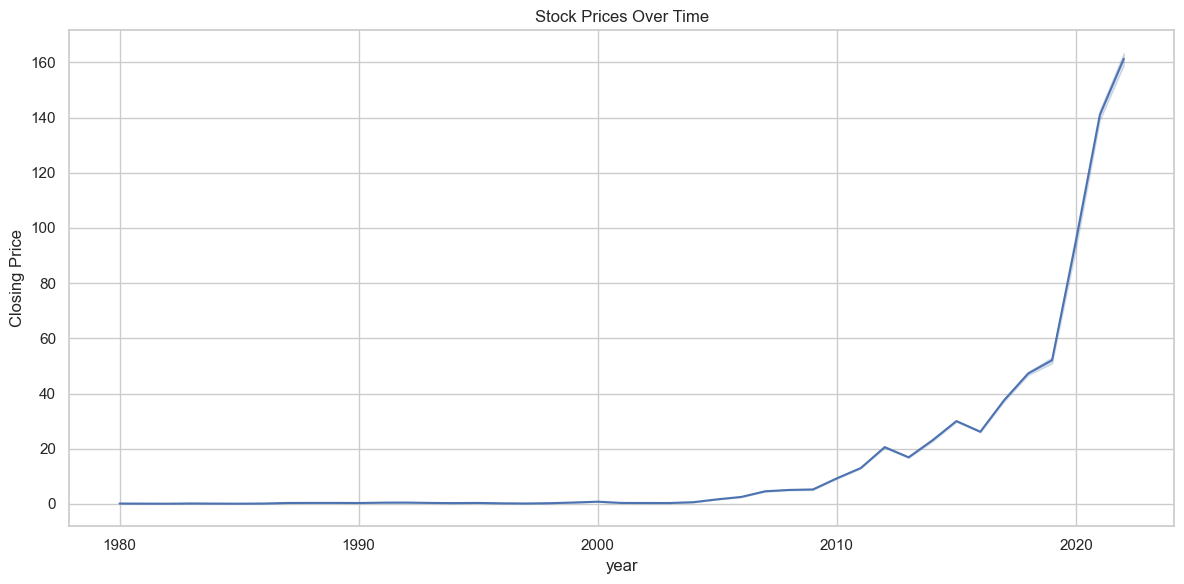

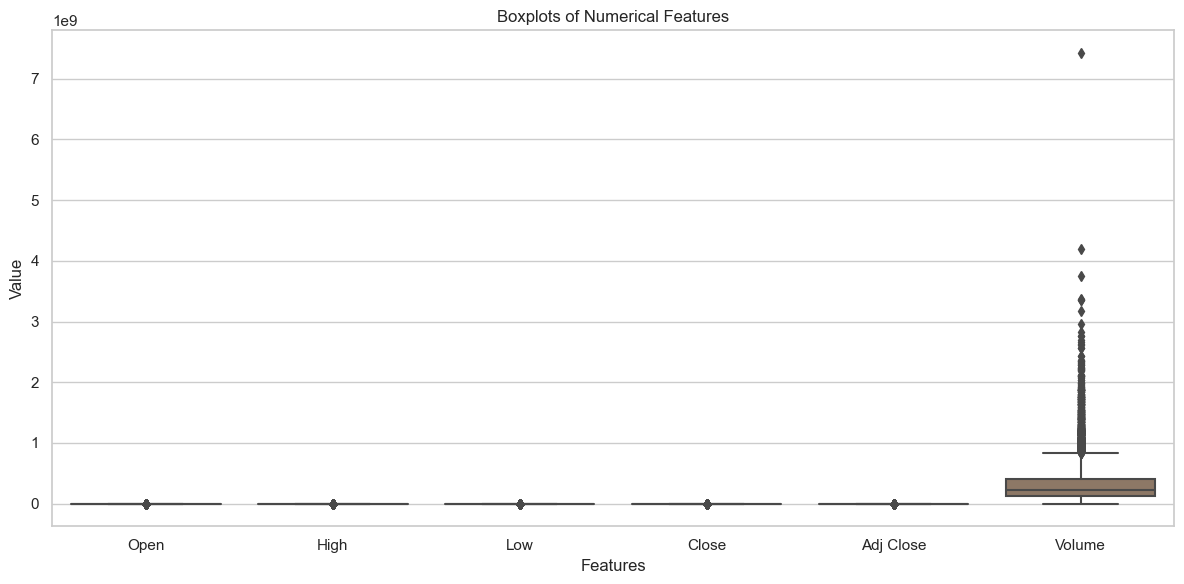

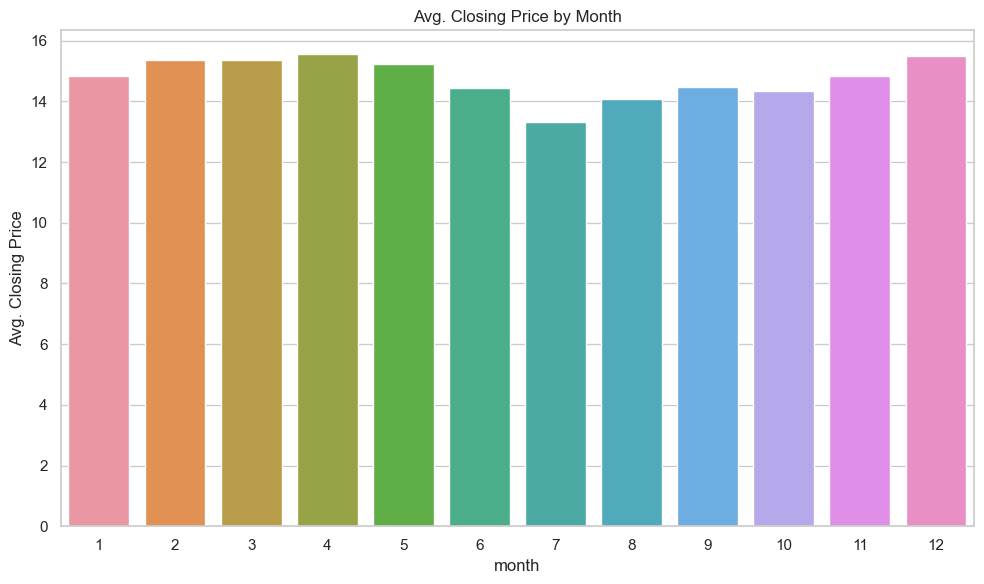

In [10]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Creating a pair plot to visualize relationships between numerical features
num_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
sns.pairplot(df[num_features], diag_kind='kde')
plt.tight_layout()
plt.show()

# Creating a heatmap to visualize correlations between numerical features
corr_matrix = df[num_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Creating a line plot to visualize the stock prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Close', data=df)
plt.xlabel('year')
plt.ylabel('Closing Price')
plt.title('Stock Prices Over Time')
plt.tight_layout()
plt.show()

# Creating boxplots to visualize the distribution of numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_features])
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Boxplots of Numerical Features')
plt.tight_layout()
plt.show()

# Creating a bar plot to visualize the average closing price by month
plt.figure(figsize=(10, 6))
monthly_avg = df.groupby('month')['Close'].mean().reset_index()
sns.barplot(x='month', y='Close', data=monthly_avg)
plt.xlabel('month')
plt.ylabel('Avg. Closing Price')
plt.title('Avg. Closing Price by Month')
plt.tight_layout()
plt.show()

Now we will actually build the model...We will divide the dataset into 3 parts...train, cross validation, test...we will do feature scaling...and then measure the error for training set and cross validation set.

In [11]:
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume', 'year', 'month', 'day', 'day_of_week', 'quarter', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = df['Close']

# spiliting the data between train and the rest
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# spiliting the data between test and cross validation
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Now we will do feature scaling

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)

We will create a baseline model to compare the error metrics of cross validation set and training set 

In [13]:
# Calculate the mean of the scaled training target variable for the training set
mean_baseline_training = y_train.mean()

# Predict the mean value for all instances in the scaled training set
mean_training_predictions = [mean_baseline_training] * len(y_train)

# Calculate error metrics for the mean baseline on the scaled training set
mae_baseline_training = mean_absolute_error(y_train, mean_training_predictions)
mse_baseline_training = mean_squared_error(y_train, mean_training_predictions)
r_squared_baseline_training = r2_score(y_train, mean_training_predictions)

# Calculate the mean of the scaled training target variable for the scaled cross-validation set
mean_baseline_cv = y_cv.mean()

# Predict the mean value for all instances in the scaled cross-validation set
mean_cv_predictions = [mean_baseline_cv] * len(y_cv)

# Calculate error metrics for the mean baseline on the scaled cross-validation set
mae_baseline_cv = mean_absolute_error(y_cv, mean_cv_predictions)
mse_baseline_cv = mean_squared_error(y_cv, mean_cv_predictions)
r_squared_baseline_cv = r2_score(y_cv, mean_cv_predictions)

print("Mean Baseline Metrics for Training Set:")
print(f"MAE: {mae_baseline_training:.2f}")
print(f"MSE: {mse_baseline_training:.2f}")
print(f"R-squared: {r_squared_baseline_training:.2f}")

print("\nMean Baseline Metrics for Cross-Validation Set:")
print(f"MAE: {mae_baseline_cv:.2f}")
print(f"MSE: {mse_baseline_cv:.2f}")
print(f"R-squared: {r_squared_baseline_cv:.2f}")

Mean Baseline Metrics for Training Set:
MAE: 19.90
MSE: 1017.16
R-squared: 0.00

Mean Baseline Metrics for Cross-Validation Set:
MAE: 20.62
MSE: 1135.58
R-squared: 0.00


Fit the model and then predict on the training set and cross validation set

In [14]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_cv_pred = model.predict(X_cv_scaled)

Calculating error for the Traning set and Cross Validation set

In [15]:
# Mean Absolute Error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_cv = mean_absolute_error(y_cv, y_cv_pred)

# Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_cv = mean_squared_error(y_cv, y_cv_pred)

# R-Squared Error
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_cv = r2_score(y_cv, y_cv_pred)

print(f"Training Set MAE: {mae_train:.2f}")
print(f"Cross-Validation Set MAE: {mae_cv:.2f}")
print(f"Training Set MSE: {mse_train:.2f}")
print(f"Cross-Validation Set MSE: {mse_cv:.2f}")
print(f"Training Set R-squared: {r_squared_train:.2f}")
print(f"Cross-Validation Set R-squared: {r_squared_cv:.2f}")

Training Set MAE: 0.12
Cross-Validation Set MAE: 0.12
Training Set MSE: 0.05
Cross-Validation Set MSE: 0.07
Training Set R-squared: 1.00
Cross-Validation Set R-squared: 1.00


Predicting for the test set

In [16]:
X_test_scaled = scaler.transform(X_test)
y_test_pred = model.predict(X_test_scaled)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r_squared_test = r2_score(y_test, y_test_pred)

print("Test Set Metrics:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"R-squared: {r_squared_test:.2f}")

Test Set Metrics:
MAE: 0.11
MSE: 0.05
R-squared: 1.00


Result

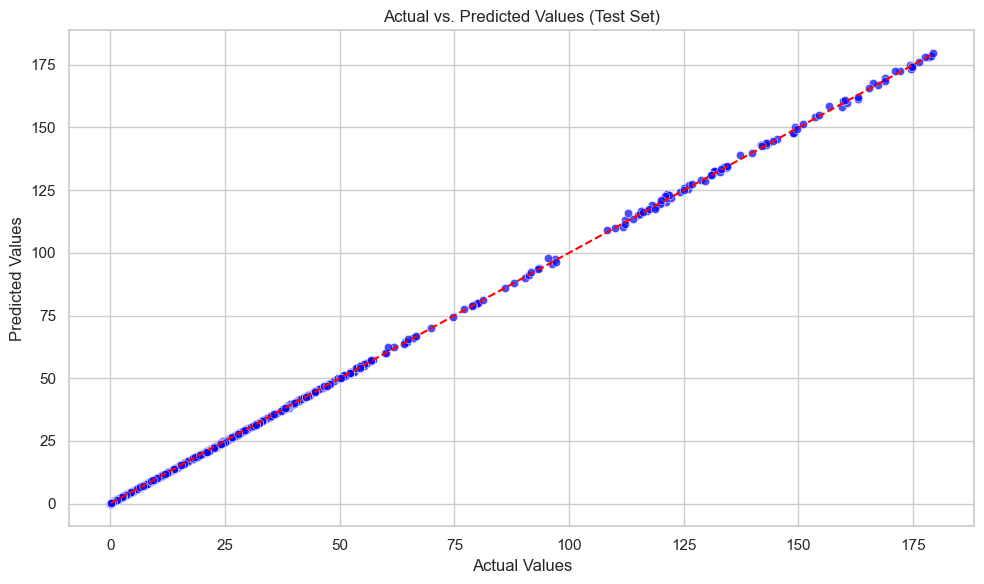

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
sns.scatterplot(x=y_test, y=y_test_pred, color='blue', alpha=0.7)

# Add labels and a diagonal line for reference
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Test Set)")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.tight_layout()
plt.show()